## Udemy Course Analysis
Udemy is one of the largest online learning platforms, offering a wide range of courses across categories like Business, Technology, Music, Health, and more. With thousands of courses and millions of learners, understanding what makes a course successful is crucial for both the platform and instructors.

The goal of this project is to perform Exploratory Data Analysis (EDA) and Data Analysis on Udemy’s course dataset to answer questions such as:

* What types of courses are most popular across categories?

* How do course features (price, duration, number of lectures, content length, etc.) influence enrollment and ratings?

* Are free courses significantly different from paid courses in terms of enrollments and ratings?

* How do course levels (Beginner, Intermediate, Expert) impact student engagement?

* What trends can be observed in course publishing dates (yearly/monthly trends)?

* Are there any outliers or patterns in pricing, ratings, or enrollment distributions?

By analyzing this dataset, we aim to uncover insights on learner preferences, pricing strategies, and engagement drivers, which can help instructors design better courses and help Udemy optimize its platform offerings.

### 1. Importing the Necessary Libraries

In [2]:
import sqlalchemy
from sqlalchemy import create_engine,inspect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### 2. Loading and Reading the Dataset

In [3]:
# Reading the Dataset
ud = pd.read_csv(r"C:\Users\JASRAJ SINGH\Desktop\Immarticus PG\Python\Datasets\udemy_courses.csv")#,header = None)
ud

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,NaN,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100.0,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25.0,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40.0,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50.0,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


### 3. Basic Data Inspection

In [4]:
# Structural Information of the Dataset 
ud.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3673 non-null   float64
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3675 non-null   object 
 9   content_duration     3675 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 319.8+ KB


* **course_id** - Unique identifier for each course on Udemy. Serves as the primary key.  
* **course_title** - Title of the course as listed on Udemy. Provides information about the course’s subject/topic.  
* **url** - URL link to the course page on Udemy. Useful for reference but not for analysis.  
* **is_paid** - Indicates whether the course is paid (True/1) or free (False/0).  
* **price** -	Price of the course (in USD). For free courses, the price is 0.  
* **num_subscribers** - Number of students enrolled (subscribed) in the course. A measure of course popularity.  
* **num_reviews**	- Number of reviews/ratings received from students. Indicates engagement and feedback.  
* **num_lectures** - Total number of lectures included in the course. Represents course size/content volume.  
* **level** - Difficulty level of the course (e.g., Beginner, Intermediate, Expert, All Levels).  
* **content_duration** - Total length of the course content in hours. Indicates how long it would take to complete.  
* **published_timestamp**	- Date and time when the course was published on Udemy. Useful for analyzing trends over time.  
* **subject**	- Broad subject category of the course (e.g., Business Finance, Graphic Design, Musical Instruments, Web Development).  

In [5]:
# shape of the Dataset ie. No of Rows and Columns
ud.shape

(3678, 12)

In [6]:
#View the Top 5 Rows of the data 
ud.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,NaN,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [7]:
#View the Bottom 5 Rows of the data 
ud.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100.0,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25.0,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40.0,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50.0,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45.0,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [8]:
# Descriptive Statistics of the Data 
ud.describe(include = "all")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
count,3.678000e+03,3678,3678,3678,3673.000000,3678.000000,3678.000000,3678.000000,3675,3675.000000,3678,3678
unique,NaN,3663,3672,2,NaN,NaN,NaN,NaN,4,NaN,3672,4
top,NaN,Creating an animated greeting card via Google ...,https://www.udemy.com/understanding-financial-...,True,NaN,NaN,NaN,NaN,All Levels,NaN,2016-12-15T14:56:17Z,Web Development
freq,NaN,3,2,3368,NaN,NaN,NaN,NaN,1926,NaN,2,1200
mean,6.759720e+05,NaN,NaN,NaN,66.139396,3197.150625,156.259108,40.108755,NaN,4.097392,NaN,NaN
std,3.432732e+05,NaN,NaN,NaN,60.998537,9504.117010,935.452044,50.383346,NaN,6.055466,NaN,NaN
min,8.324000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,4.076925e+05,NaN,NaN,NaN,20.000000,111.000000,4.000000,15.000000,NaN,1.000000,NaN,NaN
50%,6.879170e+05,NaN,NaN,NaN,45.000000,911.500000,18.000000,25.000000,NaN,2.000000,NaN,NaN
75%,9.613555e+05,NaN,NaN,NaN,95.000000,2546.000000,67.000000,45.750000,NaN,4.500000,NaN,NaN


In [9]:
ud.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [10]:
# Describing the price column
# Continous Numerical features ---> describe()
# Average course price on Udemy

ud.price.describe()

count    3673.000000
mean       66.139396
std        60.998537
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [11]:
ud[["price","num_subscribers"]].describe()

,price,num_subscribers
count,3673.000000,3678.000000
mean,66.139396,3197.150625
std,60.998537,9504.117010
min,0.000000,0.000000
25%,20.000000,111.000000
50%,45.000000,911.500000
75%,95.000000,2546.000000
max,200.000000,268923.000000


In [12]:
ud["price"].mean()

np.float64(66.13939558943643)

In [13]:
ud["price"].median()

np.float64(45.0)

In [14]:
# Discrete or Categorical Feature ----> value_counts(), unique(),nunique(),crosstab()

In [15]:
# value_counts() helps to find the frequency of values within the column

# Find the no of courses in each level.

ud["level"].value_counts()

level
All Levels            1926
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [16]:
# Find the distribution of free and paid courses?
ud["is_paid"].value_counts(normalize = True) #/len(ud)*100

is_paid
True     0.915715
False    0.084285
Name: proportion, dtype: float64

In [17]:
ud["num_lectures"].value_counts()

num_lectures
12     121
15     109
13     107
14     105
11     104
      ... 
239      1
177      1
320      1
358      1
152      1
Name: count, Length: 229, dtype: int64

In [18]:
# unique()  ---> Finds an array of unique values from the columns
ud["subject"].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [19]:
ud["level"].unique()

array(['All Levels', nan, 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [20]:
ud["price"].unique()

array([200.,  75.,  45.,  95., 150.,  65., 195.,  30.,  20.,  50., 175.,
       140., 115., 190., 125.,  60., 145., 105., 155., 185., 180., 120.,
        25., 160.,  40.,   0., 100.,  nan,  90.,  35.,  80.,  70.,  55.,
       165., 130.,  85., 170., 110., 135.])

In [21]:
ud["num_lectures"].unique()

array([ 51, 274,  36,  26,  25,  23,  38,  15,  76,  17,  19,  16,  42,
        52,  12,  39,  40,  50,  81,  37,  41,  35,  80,  22,  28,  68,
        61, 138, 110, 174, 103,  79, 227,  43,  46,  62,  53,  77,  20,
        47,  33,  11, 102,  45,  32,  30,  18,  60,  54,  24, 134,   5,
        10,  49,  14,   6, 108,  57,   9,  13,   8, 462,  29,  59, 284,
        55,  34,  31, 544,  66,  21,  88,  44,  27,  48,  90,   7,  97,
       128,  63, 235, 211, 100,  82, 123, 332, 272,  69, 129, 316,  70,
       105, 176,  91,  64,  72,   4,  58, 142, 395, 194, 527,  74,  84,
        87,  65, 460, 101,  95, 107, 113,  71, 145,  75, 444,   0, 127,
        98, 286, 120, 130,  73, 121,  56, 158, 241,  86, 187, 111,  85,
       150,  96,  94, 119,  78, 122, 124, 163, 131,  67, 141, 118, 166,
       154, 185, 207, 225, 202, 115, 156,  83,  99, 196, 162,  89, 362,
       136, 310, 104, 291, 144, 161, 224, 240, 183, 192, 309, 215, 106,
       321, 151,  92, 126, 112,  93, 125, 348, 402, 135, 171, 21

In [22]:
# .unique() ----> No of unique values within the column
ud["level"].nunique()

4

In [23]:
ud["level"].describe()

count           3675
unique             4
top       All Levels
freq            1926
Name: level, dtype: object

In [24]:
ud["num_lectures"].nunique()

229

In [25]:
ud["course_id"].nunique()

3672

In [27]:
ud.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                  float64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [28]:
#Changing the dtypes of columns

ud["is_paid"] = ud["is_paid"].astype("str") 

In [29]:
ud["is_paid"].unique()

array(['True', 'False'], dtype=object)

In [31]:
ud["is_paid"].replace(['True','False'],["Paid","Un-paid"],inplace = True)

In [32]:
# no of courses which are free or paid with respect to each level
pd.crosstab(index = ud["level"],columns = ud["is_paid"], normalize = True)*100   # normalize = True *100 gives us the output in percentage level 

is_paid,Paid,Un-paid
level,,
All Levels,49.088435,3.319728
Beginner Level,30.258503,4.299320
Expert Level,1.578231,0.000000
Intermediate Level,10.639456,0.816327


In [33]:
# Find the avg price of course regarding to the subject and course level

pd.crosstab(index = ud["level"],columns = ud["subject"], values = ud["price"] ,aggfunc= 'mean')

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
level,,,,
All Levels,75.130058,62.701342,55.978261,82.526555
Beginner Level,54.017857,53.477366,43.378378,68.363171
Expert Level,95.967742,70.000000,36.428571,113.666667
Intermediate Level,66.054688,49.824561,51.039604,71.259259


### 4. Accessing the data 

1.Labels/indexing                       
2.Conditional approach

In [34]:
# Access the entries from 100 to 500 rows
ud.loc[100:500:2,"course_title":"num_lectures"]

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures
100,High performance Stock Trading using key Optio...,https://www.udemy.com/high-performance-stock-t...,Paid,40.0,2103,15,6
102,Basics of Economics (College Level),https://www.udemy.com/economics-for-accounting...,Paid,25.0,2516,12,20
104,Accounting for Beginners : Learn Basics in und...,https://www.udemy.com/accounting-for-beginners...,Paid,50.0,1971,13,20
106,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,Un-paid,NaN,17160,620,23
108,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,Un-paid,0.0,6811,151,51
...,...,...,...,...,...,...,...
492,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,Un-paid,0.0,65576,936,24
494,Forex Basics,https://www.udemy.com/forex-basics/,Un-paid,0.0,22344,712,26
496,Bitcoin - Ethereum: Trading -Watch me manage m...,https://www.udemy.com/bitcoin-tips/,Paid,165.0,431,58,22
498,FastTrack to Stock Trading Strategies,https://www.udemy.com/fasttrack-to-stock-tradi...,Paid,25.0,5685,5,12


In [35]:
# Fetch details only related to course_title,price,subject,level,number_lectures for all courses
ud.loc[:,["course_title","price","subject","level","num_lectures"]]

,course_title,price,subject,level,num_lectures
0,Ultimate Investment Banking Course,200.0,Business Finance,All Levels,51
1,Complete GST Course & Certification - Grow You...,75.0,Business Finance,NaN,274
2,Financial Modeling for Business Analysts and C...,45.0,Business Finance,Intermediate Level,51
3,Beginner to Pro - Financial Analysis in Excel ...,95.0,Business Finance,All Levels,36
4,How To Maximize Your Profits Trading Options,200.0,Business Finance,Intermediate Level,26
...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,100.0,Web Development,All Levels,21
3674,How To Design A WordPress Website With No Codi...,25.0,Web Development,Beginner Level,42
3675,Learn and Build using Polymer,40.0,Web Development,All Levels,48
3676,CSS Animations: Create Amazing Effects on Your...,50.0,Web Development,All Levels,38


In [36]:
ud.iloc[100:501,2:8]

,url,is_paid,price,num_subscribers,num_reviews,num_lectures
100,https://www.udemy.com/high-performance-stock-t...,Paid,40.0,2103,15,6
101,https://www.udemy.com/introduction-to-financia...,Paid,20.0,1480,25,25
102,https://www.udemy.com/economics-for-accounting...,Paid,25.0,2516,12,20
103,https://www.udemy.com/the-beginners-guide-to-t...,Un-paid,NaN,50855,2698,15
104,https://www.udemy.com/accounting-for-beginners...,Paid,50.0,1971,13,20
...,...,...,...,...,...,...
496,https://www.udemy.com/bitcoin-tips/,Paid,165.0,431,58,22
497,https://www.udemy.com/learn-technical-analysis...,Paid,200.0,1199,37,79
498,https://www.udemy.com/fasttrack-to-stock-tradi...,Paid,25.0,5685,5,12
499,https://www.udemy.com/algorithmic-futures-trad...,Paid,195.0,1512,23,19


In [37]:
# Finding the course having course price greater than 150 USD
ud[ud["price"]>150]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,Paid,195.0,5172,34,38,Expert Level,2.5,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,Paid,200.0,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance
10,592338,Forex Trading Secrets of the Pros With Amazon'...,https://www.udemy.com/trading-with-amazons-aws...,Paid,200.0,4284,93,76,NaN,5.0,2015-09-11T16:47:02Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3620,1227578,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,Paid,200.0,50,5,60,Beginner Level,5.0,2017-05-29T17:56:24Z,Web Development
3642,709324,Learn Web Development by Creating a Social Net...,https://www.udemy.com/meteor-tutorial/,Paid,200.0,442,48,80,Beginner Level,6.5,2015-12-30T16:53:44Z,Web Development
3647,975916,17 Complete JavaScript projects explained st...,https://www.udemy.com/17-complete-javascript-p...,Paid,185.0,327,26,106,Beginner Level,9.5,2016-10-26T14:03:38Z,Web Development
3652,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,https://www.udemy.com/learn-bootstrap-4-the-mo...,Paid,200.0,279,37,119,All Levels,10.0,2017-04-25T00:57:35Z,Web Development


In [38]:
# Filtering out the course details for the Intermediate Level course
ud[ud["level"] == "Intermediate Level"]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
15,504036,Short Selling: Learn To Sell Stocks Before The...,https://www.udemy.com/short-selling-learn-to-s...,Paid,75.0,2276,106,19,Intermediate Level,1.5,2015-06-22T21:18:35Z,Business Finance
27,447362,Create Your Own Hedge Fund: Trade Stocks Like ...,https://www.udemy.com/create-your-own-hedge-fu...,Paid,175.0,4005,237,25,Intermediate Level,2.0,2015-04-12T20:13:47Z,Business Finance
35,434774,Options Trading Stocks: Proven Toolbox For Fin...,https://www.udemy.com/trading-stock-options-ii...,Paid,195.0,7884,118,68,Intermediate Level,10.0,2015-05-19T23:25:41Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3619,973932,Learn Spring Security 4 Intermediate - Hands On,https://www.udemy.com/learn-spring-security-4-...,Paid,95.0,227,16,20,Intermediate Level,2.0,2016-10-03T16:16:36Z,Web Development
3635,576054,"WordPress Development - Themes, Plugins & Sing...",https://www.udemy.com/wordpress-development-cr...,Paid,150.0,817,164,131,Intermediate Level,19.5,2016-03-02T06:26:16Z,Web Development
3639,261148,create a search engine for your website!,https://www.udemy.com/create-a-simple-php-mysq...,Paid,20.0,1832,6,12,Intermediate Level,1.5,2014-07-17T18:28:04Z,Web Development
3644,554136,Building Responsive Websites with Bootstrap 3 ...,https://www.udemy.com/building-responsive-webs...,Paid,75.0,1322,14,27,Intermediate Level,3.0,2015-07-22T22:54:03Z,Web Development


In [39]:
# price >150 and level = intermediate
ud[(ud["price"] > 150) & (ud["level"] == "Intermediate Level")]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.000000,2016-12-13T14:57:18Z,Business Finance
27,447362,Create Your Own Hedge Fund: Trade Stocks Like ...,https://www.udemy.com/create-your-own-hedge-fu...,Paid,175.0,4005,237,25,Intermediate Level,2.000000,2015-04-12T20:13:47Z,Business Finance
35,434774,Options Trading Stocks: Proven Toolbox For Fin...,https://www.udemy.com/trading-stock-options-ii...,Paid,195.0,7884,118,68,Intermediate Level,10.000000,2015-05-19T23:25:41Z,Business Finance
125,528784,Stock market Investing Encyclopedia: How to in...,https://www.udemy.com/stockmarket/,Paid,200.0,3143,11,39,Intermediate Level,3.000000,2015-11-10T22:55:53Z,Business Finance
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,Paid,200.0,453,42,33,Intermediate Level,3.000000,2017-03-14T00:39:45Z,Business Finance
274,867440,"Bitcoin: el futuro del dinero, hoy",https://www.udemy.com/bitcoin-el-futuro-del-di...,Paid,200.0,57,22,19,Intermediate Level,3.000000,2016-06-06T00:06:37Z,Business Finance
332,990440,My Forex Strategy that win consistently over a...,https://www.udemy.com/my-forex-strategy-that-h...,Paid,200.0,204,23,9,Intermediate Level,1.500000,2016-10-29T14:51:53Z,Business Finance
415,1208148,Coaching Course:Investment Analysis for your c...,https://www.udemy.com/coaching-courseinvestmen...,Paid,200.0,1,0,6,Intermediate Level,0.566667,2017-06-23T16:35:04Z,Business Finance
437,130366,Trading: High-ROI Trading,https://www.udemy.com/the-high-roi-trading-vid...,Paid,190.0,126,20,47,Intermediate Level,12.500000,2014-02-05T19:02:33Z,Business Finance
750,971110,The Truths about (in)secure Retirement,https://www.udemy.com/retirement-planning-calc...,Paid,200.0,86,6,32,Intermediate Level,4.500000,2016-10-03T18:42:18Z,Business Finance


In [40]:
# Filter out the courses which are either unpaid or having price as 200 USD
ud[(ud["price"] == 200) | (ud["is_paid"] == "Un-paid") | (ud["level"] == "Expert Level")]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.500000,2017-01-18T20:58:58Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.000000,2016-12-13T14:57:18Z,Business Finance
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,Paid,195.0,5172,34,38,Expert Level,2.500000,2015-05-28T00:14:03Z,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,Paid,200.0,827,14,15,All Levels,1.000000,2017-04-18T18:13:32Z,Business Finance
10,592338,Forex Trading Secrets of the Pros With Amazon'...,https://www.udemy.com/trading-with-amazons-aws...,Paid,200.0,4284,93,76,NaN,5.000000,2015-09-11T16:47:02Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3652,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,https://www.udemy.com/learn-bootstrap-4-the-mo...,Paid,200.0,279,37,119,All Levels,10.000000,2017-04-25T00:57:35Z,Web Development
3653,1248172,Essentials of Spring 5.0 for Developers,https://www.udemy.com/essentials-of-spring-50-...,Paid,125.0,34,2,21,Expert Level,1.500000,2017-06-11T18:34:40Z,Web Development
3654,949134,The Extreme Web Development Course - For Begin...,https://www.udemy.com/the-extreme-web-developm...,Paid,200.0,1420,62,152,All Levels,5.500000,2016-09-04T20:51:08Z,Web Development
3665,21386,Beginner Photoshop to HTML5 and CSS3,https://www.udemy.com/psd-html5-css3/,Un-paid,0.0,73110,1716,22,All Levels,2.000000,2012-07-27T12:54:57Z,Web Development


In [41]:
# Filter out the course title  ,price, subject,num_lecture and course duration for unpaid courses

In [42]:
ud[ud["is_paid"] == "Un-paid" ][["course_title","price","subject","num_lectures","content_duration"]]

,course_title,price,subject,num_lectures,content_duration
95,Options Trading 101: The Basics,0.0,Business Finance,11,0.550000
103,Stock Market Investing for Beginners,NaN,Business Finance,15,1.500000
106,Fundamentals of Forex Trading,NaN,Business Finance,23,1.000000
108,Website Investing 101 - Buying & Selling Onlin...,0.0,Business Finance,51,2.000000
112,Stock Market Foundations,NaN,Business Finance,9,2.000000
...,...,...,...,...,...
3638,Building a Search Engine in PHP & MySQL,0.0,Web Development,12,2.500000
3643,CSS Image filters - The modern web images colo...,0.0,Web Development,16,1.500000
3651,Drupal 8 Site Building,0.0,Web Development,48,4.500000
3665,Beginner Photoshop to HTML5 and CSS3,0.0,Web Development,22,2.000000


In [43]:
ud.loc[ud["is_paid"] == "Un-paid",["course_title","price","subject","num_lectures","content_duration"]]

,course_title,price,subject,num_lectures,content_duration
95,Options Trading 101: The Basics,0.0,Business Finance,11,0.550000
103,Stock Market Investing for Beginners,NaN,Business Finance,15,1.500000
106,Fundamentals of Forex Trading,NaN,Business Finance,23,1.000000
108,Website Investing 101 - Buying & Selling Onlin...,0.0,Business Finance,51,2.000000
112,Stock Market Foundations,NaN,Business Finance,9,2.000000
...,...,...,...,...,...
3638,Building a Search Engine in PHP & MySQL,0.0,Web Development,12,2.500000
3643,CSS Image filters - The modern web images colo...,0.0,Web Development,16,1.500000
3651,Drupal 8 Site Building,0.0,Web Development,48,4.500000
3665,Beginner Photoshop to HTML5 and CSS3,0.0,Web Development,22,2.000000


### 5. DATA CLEANING
Cleaning means fixing messy/untidy data

Messy data could be:

Empty cells  
Data in wrong format  
Wrong data  
Duplicates  

#### 1.Handling missing Values

In [44]:
ud.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  5
num_subscribers        0
num_reviews            0
num_lectures           0
level                  3
content_duration       3
published_timestamp    0
subject                0
dtype: int64

In [45]:
ud[ud["price"].isnull()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,Un-paid,NaN,50855,2698,15,Beginner Level,1.5,2013-12-25T19:53:34Z,Business Finance
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,Un-paid,NaN,17160,620,23,All Levels,1.0,2014-08-29T20:10:38Z,Business Finance
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,Un-paid,NaN,19339,794,9,Beginner Level,2.0,2014-03-31T21:35:06Z,Business Finance
128,777444,Corporate Finance - A Brief Introduction,https://www.udemy.com/finance-a-brief-introduc...,Un-paid,NaN,11724,649,17,Beginner Level,1.5,2016-03-04T05:58:09Z,Business Finance
143,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,Un-paid,NaN,56659,4397,16,Beginner Level,1.5,2013-04-07T21:39:25Z,Business Finance


In [46]:
# ud["price"].fillna(0)

In [47]:
# ud[ud["price"].isnull()]

In [48]:
ud.dropna(subset=["price"])

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75.0,2792,923,274,NaN,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,Paid,100.0,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,Paid,25.0,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,Paid,40.0,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,Paid,50.0,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [49]:
ud.dropna(how = 'any' , subset = ["price","level"])

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,Paid,150.0,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,Paid,100.0,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,Paid,25.0,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,Paid,40.0,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,Paid,50.0,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [50]:
ud["price"].fillna(value = 0 ,inplace = True)

In [51]:
ud.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  3
content_duration       3
published_timestamp    0
subject                0
dtype: int64

In [52]:
ud[ud["level"].isnull()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75.0,2792,923,274,NaN,39.0,2017-03-09T16:34:20Z,Business Finance
10,592338,Forex Trading Secrets of the Pros With Amazon'...,https://www.udemy.com/trading-with-amazons-aws...,Paid,200.0,4284,93,76,NaN,5.0,2015-09-11T16:47:02Z,Business Finance
22,506568,Create A Business From Home Trading Stocks Tod...,https://www.udemy.com/work-from-home-buying-pe...,Paid,75.0,10149,83,16,NaN,2.0,2015-05-26T17:25:46Z,Business Finance


In [53]:
# ud.fillna(method = "bfill/fill") b fill is backward fill, f fill is Forward fill

In [54]:
ud.fillna(method = "bfill")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75.0,2792,923,274,Intermediate Level,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,Paid,100.0,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,Paid,25.0,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,Paid,40.0,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,Paid,50.0,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [55]:
# Central Tendency
ud.level.unique()

array(['All Levels', nan, 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [56]:
ud.level.value_counts()

level
All Levels            1926
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [57]:
ud.level.mode()[0] # mode is used for discrete or categorical data 

'All Levels'

In [58]:
ud["level"].fillna(ud.level.mode()[0],inplace = True)

In [59]:
ud.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       3
published_timestamp    0
subject                0
dtype: int64

In [60]:
ud

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75.0,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,Paid,100.0,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,Paid,25.0,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,Paid,40.0,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,Paid,50.0,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [61]:
ud[ud["content_duration"].isnull()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,Paid,65.0,1540,178,26,Beginner Level,NaN,2016-02-21T18:23:12Z,Business Finance
19,58977,Financial Statements Made Easy,https://www.udemy.com/intro-to-financial-state...,Paid,95.0,8095,249,12,Beginner Level,NaN,2013-06-09T00:21:26Z,Business Finance
116,1191504,How to create a routine Trading,https://www.udemy.com/how-to-create-a-trading-...,Paid,25.0,307,8,5,All Levels,NaN,2017-05-01T18:50:43Z,Business Finance


In [62]:
ud.content_duration.mean()

np.float64(4.097392290250612)

In [63]:
ud.content_duration.median()

np.float64(2.0)

In [64]:
ud["content_duration"].fillna(ud.content_duration.median(),inplace = True)

In [65]:
ud.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Now we Have filled/removed all the missing values from the Data

#### 2. Handling Data in wrong format


In [66]:
ud.dtypes

course_id                int64
course_title            object
url                     object
is_paid                 object
price                  float64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [67]:
ud["published_timestamp"] = pd.to_datetime(ud["published_timestamp"])

In [68]:
ud["published_year"]= ud["published_timestamp"].dt.year
ud

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75.0,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95.0,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,Paid,100.0,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,2016
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,Paid,25.0,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,2017
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,Paid,40.0,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development,2015
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,Paid,50.0,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,2016


In [69]:
# COUNT how many courses were published in each year

In [70]:
ud.groupby("published_year")["course_id"].count()

published_year
2011       5
2012      45
2013     202
2014     491
2015    1014
2016    1206
2017     715
Name: course_id, dtype: int64

In [71]:
ud["published_year"].value_counts()

published_year
2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: count, dtype: int64

In [72]:
ud.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,published_year
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.095682,2015.431213
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053291,1.185317
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000,2015.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000,2016.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000,2016.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000


In [73]:
ud[ud["content_duration"] == 0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investo...,Paid,20.0,0,0,0,All Levels,0.0,2015-12-17 05:38:38+00:00,Business Finance,2015


In [75]:
ud.drop(892,inplace = True) # ud.drop(892,inplace = True,axis = 0) 0 for Rows and 1 for columns

In [76]:
ud[ud["num_lectures"] == 0].index

Index([], dtype='int64')

In [77]:
# ud[ud["num_lectures"] == 0].index,inplace = True   //// Another method to drop by using index

#### 4. Handling Duplicate entries into the data

In [78]:
ud["course_id"].nunique()

3671

In [79]:
# Filtering Duplicate Records

In [80]:
ud[ud.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,Paid,20.0,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance,2016
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,Paid,20.0,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,Paid,25.0,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance,2016
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,Paid,40.0,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance,2017
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,Paid,20.0,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design,2014
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,Paid,75.0,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development,2013


In [81]:
ud.drop_duplicates(inplace = True)

In [82]:
ud[ud.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year


In [83]:
ud

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75.0,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95.0,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,Paid,100.0,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,2016
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,Paid,25.0,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,2017
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,Paid,40.0,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development,2015
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,Paid,50.0,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,2016


In [84]:
ud["level"].value_counts()

level
All Levels            1924
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [85]:
ud["level"].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

### 6. Exploratory Data Analysis
The goal of this project is to perform Exploratory Data Analysis (EDA) and Data Analysis on Udemy’s course dataset to answer questions such as:

#### **1) What are all different subjects for which Udemy is offering courses?**

In [86]:
print(list(ud["subject"].unique()))

['Business Finance', 'Graphic Design', 'Musical Instruments', 'Web Development']


#### **2) Which subject has the maximum number of courses?**

<Axes: xlabel='subject'>

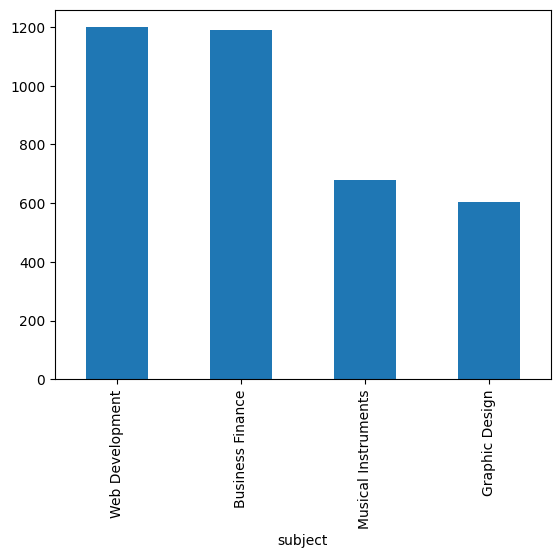

In [87]:
ud["subject"].value_counts().plot(kind = "bar")

Here we can see that "Web Development" subject has maximum number of courses which is 1200

#### **3) What type of level courses Udemy provided to student?**

In [88]:
a = pd.Series(ud.level.unique())
print(a)

0            All Levels
1    Intermediate Level
2        Beginner Level
3          Expert Level
dtype: object


We now know that there are 4 levels of courses provided to students

#### **4) Show all the courses which are Free of Cost.**

In [89]:
ud[ud["is_paid"] == 'Un-paid'][["course_id","course_title"]]

,course_id,course_title
95,1148774,Options Trading 101: The Basics
103,133536,Stock Market Investing for Beginners
106,265960,Fundamentals of Forex Trading
108,923616,Website Investing 101 - Buying & Selling Onlin...
112,191854,Stock Market Foundations
...,...,...
3638,155640,Building a Search Engine in PHP & MySQL
3643,366720,CSS Image filters - The modern web images colo...
3651,1079078,Drupal 8 Site Building
3665,21386,Beginner Photoshop to HTML5 and CSS3


Here are the courses which are Free of Cost provided by udemy.

#### **5) What are courses that were published in the year 2012?**

In [90]:
ud[ud["published_year"] == 2012]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year
178,24877,Introductory Financial Accounting,https://www.udemy.com/introductory-financial-a...,Paid,80.0,1793,265,54,Beginner Level,10.000000,2012-10-03 03:20:10+00:00,Business Finance,2012
409,28172,Practical Trading on Financial Futures & Optio...,https://www.udemy.com/getting-started-with-opt...,Paid,50.0,43,0,25,Beginner Level,4.000000,2012-11-12 15:01:43+00:00,Business Finance,2012
416,24815,Harnessing the Power of Growth Stocks,https://www.udemy.com/harnessing-the-power-of-...,Paid,50.0,29,2,7,Intermediate Level,2.000000,2012-10-31 01:05:18+00:00,Business Finance,2012
428,25794,How To Crowdfund,https://www.udemy.com/how-to-crowdfund/,Paid,30.0,43,6,17,All Levels,1.500000,2012-10-02 22:00:03+00:00,Business Finance,2012
815,19653,Accounting Skills for Managers,https://www.udemy.com/accounting-skills-for-ma...,Paid,20.0,78,3,10,Beginner Level,1.500000,2012-06-27 16:41:09+00:00,Business Finance,2012
1126,20185,The Complete Forex Trader,https://www.udemy.com/forextrader/,Paid,25.0,1634,142,46,All Levels,7.000000,2012-10-01 09:46:23+00:00,Business Finance,2012
1202,28556,Discover How to Draw and paint Comics,https://www.udemy.com/learn-to-draw-and-paint/,Paid,65.0,8901,424,85,All Levels,62.000000,2012-11-21 22:03:54+00:00,Graphic Design,2012
1216,20461,How to Design a Logo - a Beginners Course,https://www.udemy.com/how-to-design-a-logo-a-b...,Paid,30.0,10875,650,41,All Levels,2.500000,2012-07-25 13:41:42+00:00,Graphic Design,2012
1229,16714,Color Basics for Print Designers,https://www.udemy.com/color-basics-for-print-d...,Paid,20.0,372,21,10,All Levels,0.600000,2012-04-23 21:13:00+00:00,Graphic Design,2012
1278,19164,Graphic Design Secrets Revealed,https://www.udemy.com/design-like-a-pro-graphi...,Paid,95.0,2555,28,55,All Levels,6.000000,2012-09-04 02:21:04+00:00,Graphic Design,2012


#### **6) Show all courses of Graphic Design where the price is below 50?**

In [91]:
ud[(ud["subject"] == 'Graphic Design') & (ud["price"] < 50)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year
1198,1219520,Adobe Illustrator T-Shirt Design for Merch by ...,https://www.udemy.com/merchbyamazondesign/,Paid,20.0,390,44,15,All Levels,1.0,2017-06-13 20:41:14+00:00,Graphic Design,2017
1203,317278,Typographic Logos: Typography and Lettering fo...,https://www.udemy.com/typographic-logos-typogr...,Paid,25.0,4235,427,20,Intermediate Level,1.5,2014-10-16 19:30:01+00:00,Graphic Design,2014
1204,573064,Photoshop in Ease: Create World Amazing Graph...,https://www.udemy.com/photoshop-knights-become...,Paid,20.0,14440,182,26,All Levels,3.0,2015-08-13 21:17:34+00:00,Graphic Design,2015
1207,590794,Illustrator Quick Tip：10分でKawaiiカメレオンを描こう,https://www.udemy.com/illustrator-quick-tip10k...,Un-paid,0.0,381,24,7,All Levels,0.6,2015-08-31 20:52:45+00:00,Graphic Design,2015
1208,1181578,Deinen Roman setzen mit PagePlus in 10 einfach...,https://www.udemy.com/deinen-roman-setzen-mit-...,Un-paid,0.0,69,6,25,All Levels,3.5,2017-04-24 16:44:12+00:00,Graphic Design,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,456388,Adobe Photoshop CC | The Essential Guide,https://www.udemy.com/adobe-photoshop-cc-the-e...,Paid,20.0,254,5,81,All Levels,4.5,2015-05-12 00:19:27+00:00,Graphic Design,2015
1794,955242,Learn to Composite a 2D Action Shot in Photoshop,https://www.udemy.com/3dmotive-learn-to-compos...,Paid,20.0,40,2,8,Beginner Level,1.5,2016-09-10 21:38:26+00:00,Graphic Design,2016
1795,496430,Infographic Design: How To Create Your Own Inf...,https://www.udemy.com/infographic-design-how-t...,Paid,20.0,84,8,13,All Levels,2.0,2015-05-12 20:38:58+00:00,Graphic Design,2015
1796,793246,Autodesk Inventor 2016 : Complete Guide,https://www.udemy.com/learn-autodesk-inventor-...,Paid,20.0,23,4,83,Beginner Level,7.5,2016-03-22 20:35:56+00:00,Graphic Design,2016


There are total 377 Courses of Graphic Design where the price is below 50

#### **7) How to vary number of subscribers with paid courses?**

Text(0.5, 0, 'price')

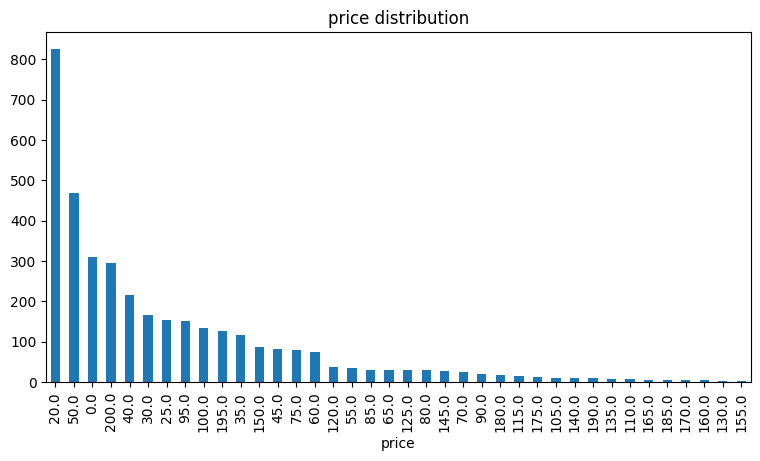

In [92]:
plt.subplot(221)
ud['price'].value_counts().plot(kind='bar', title='price distribution',figsize=(20,10))
plt.xlabel('price')

Here the above figure shows the maximum no of courses have prices between 0 to 200 .

It means all subjects courses have moderate price and affordable by the students.

#### 8) Which are Top Selling Courses?

In [93]:
d = ud.sort_values('num_subscribers', ascending=False)
d.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,Un-paid,0.0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,2013
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,Un-paid,0.0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,2013
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,Paid,200.0,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,2015
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,Un-paid,0.0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,2014
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,Paid,200.0,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,2016


 Above are the top 5 Courses and "Learn HTML5 Programming From Scratch" has the highest no of subscribers ie.2,68,923  . 

 So we can understand that this course has higher demand as of now.

#### 9) Distribution of subscribers according to year

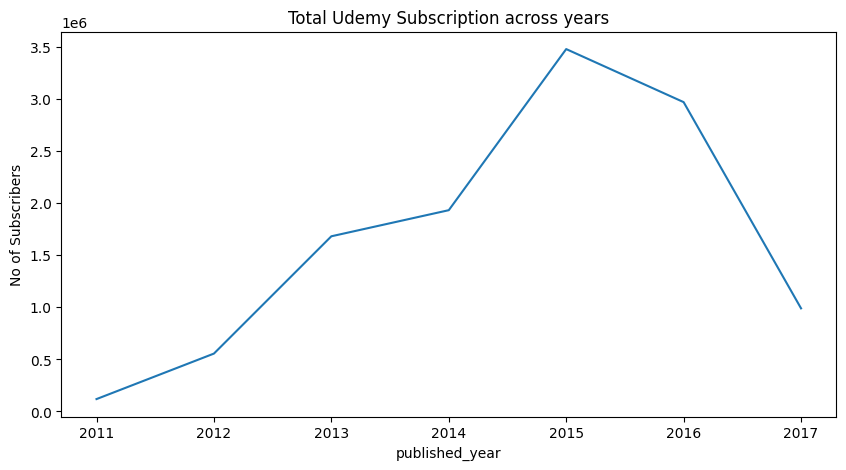

In [94]:
ud.groupby('published_year')['num_subscribers'].sum().plot(kind = "line",figsize=(10,5))
plt.title('Total Udemy Subscription across years')
plt.ylabel('No of Subscribers')
plt.show()

Here we can see that maximum nummber of subscribers were in the year 2015. So in the year 2015 there is maximum enrollment for courses.

#### **10. What types of courses are most popular across categories?**

In [95]:
category_popularity = ud.groupby('subject')['num_subscribers'].sum().sort_values(ascending=False)

In [96]:
print("Total subscribers by course category:")
print(category_popularity)


Total subscribers by course category:
subject
Web Development        7937287
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Name: num_subscribers, dtype: int64


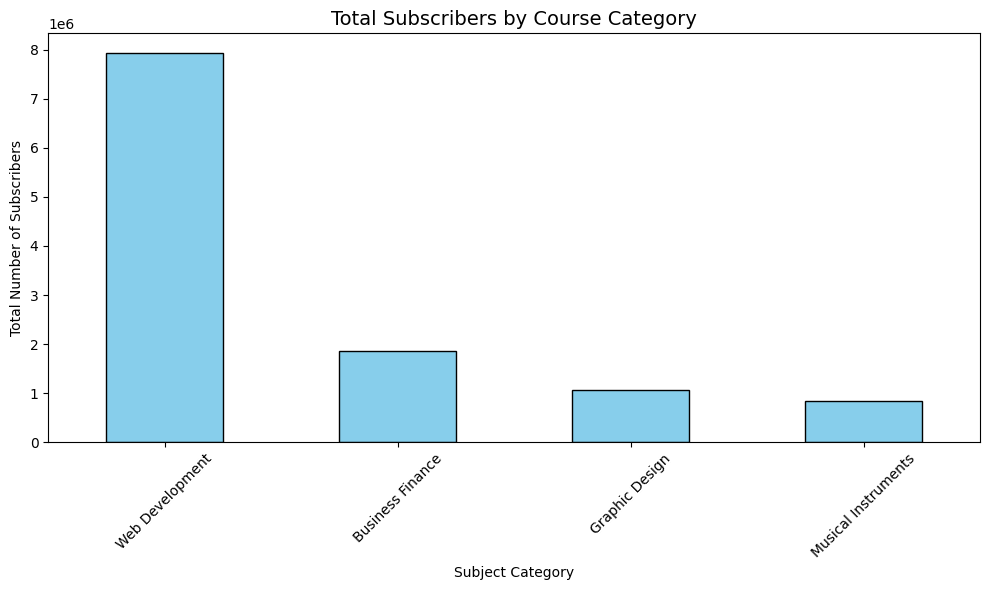

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
category_popularity.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Subscribers by Course Category', fontsize=14)
plt.xlabel('Subject Category')
plt.ylabel('Total Number of Subscribers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that Web Development course has a maximum number of students ie.79,37,287

#### **11. How do course features (price, duration, number of lectures, content length, etc.) influence enrollment and ratings?**

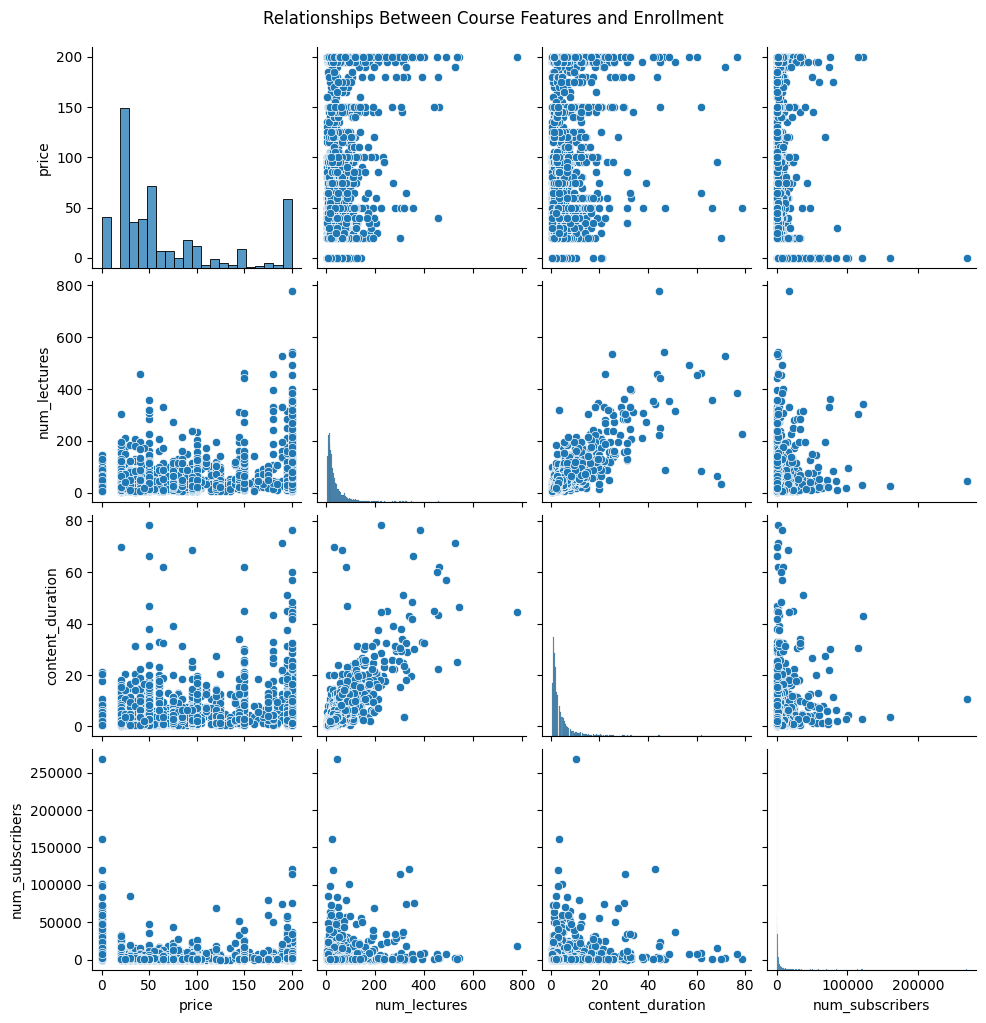

In [98]:
features = ['price', 'num_lectures', 'content_duration', 'num_subscribers']
# Pairplot for visual correlation
sns.pairplot(ud[features])
plt.suptitle("Relationships Between Course Features and Enrollment", y=1.02)
plt.show()

Here we can first understand the relationship between the features. 

Correlation Matrix:
                     price  num_lectures  content_duration  num_subscribers
price             1.000000      0.329834          0.293101         0.050372
num_lectures      0.329834      1.000000          0.801562         0.158294
content_duration  0.293101      0.801562          1.000000         0.162083
num_subscribers   0.050372      0.158294          0.162083         1.000000


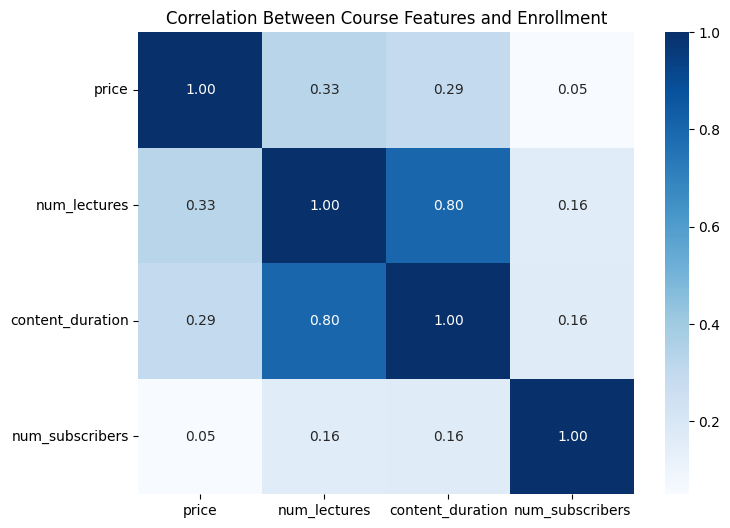

In [99]:
# Computing the  correlation matrix
corr_matrix = ud[['price', 'num_lectures', 'content_duration', 'num_subscribers']].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Visualize
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Course Features and Enrollment')
plt.show()


A positive correlation (close to +1) means that as one feature increases, so does the other (e.g., longer content → more subscribers).

A negative correlation (close to -1) means that as one increases, the other decreases (e.g., higher price → fewer subscribers).

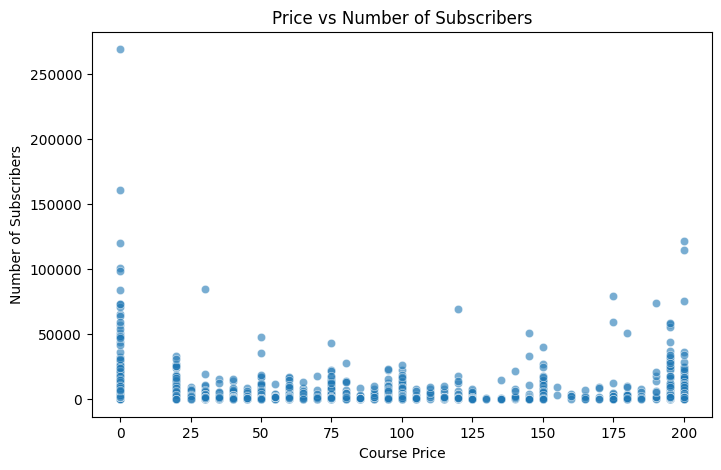

In [100]:
#1.  Price vs Enrollment
plt.figure(figsize=(8,5))
sns.scatterplot(data=ud, x='price', y='num_subscribers', alpha=0.6)
plt.title('Price vs Number of Subscribers')
plt.xlabel('Course Price')
plt.ylabel('Number of Subscribers')
plt.show()

Here we see that free or low-priced courses get more enrollments.

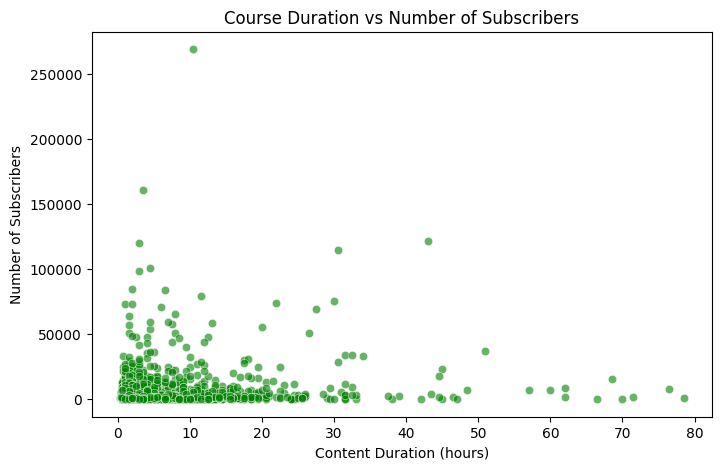

In [101]:
# 2.Duration vs Enrollment
plt.figure(figsize=(8,5))
sns.scatterplot(data=ud, x='content_duration', y='num_subscribers', alpha=0.6, color='green')
plt.title('Course Duration vs Number of Subscribers')
plt.xlabel('Content Duration (hours)')
plt.ylabel('Number of Subscribers')
plt.show()


- Most popular courses have short-to-moderate durations (under ~10 hours).
- There’s a slight upward spread for moderate durations, but not much beyond 30 hours.

So Students prefer short, concise courses — longer courses don’t guarantee more subscribers.

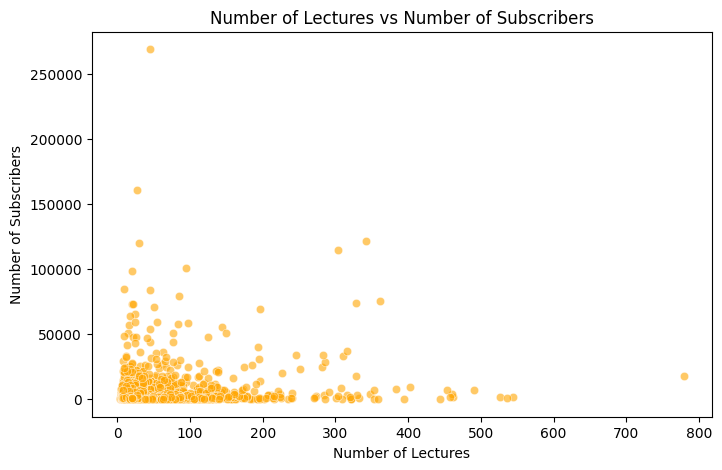

In [102]:
# Number of Lectures vs Enrollment
plt.figure(figsize=(8,5))
sns.scatterplot(data=ud, x='num_lectures', y='num_subscribers', alpha=0.6, color='orange')
plt.title('Number of Lectures vs Number of Subscribers')
plt.xlabel('Number of Lectures')
plt.ylabel('Number of Subscribers')
plt.show()


- Most courses with high enrollments have fewer than ~100 lectures.
- Beyond that, adding more lectures doesn’t clearly increase subscribers.
  
So, Course structure (many lectures) isn’t a strong driver of popularity.

In [103]:
# Multiple regression analysis
import statsmodels.api as sm

# Select numeric features
X = ud[['price', 'num_lectures', 'content_duration']]
y = ud['num_subscribers']

# Add constant term for regression intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Summary of regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        num_subscribers   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     35.92
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           7.14e-23
Time:                        17:53:27   Log-Likelihood:                -38774.
No. Observations:                3671   AIC:                         7.756e+04
Df Residuals:                    3667   BIC:                         7.758e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2000.0431    238.758  

Here a negative coefficient for price means higher price → fewer subscribers.

A positive coefficient for content_duration means longer courses → more subscribers.

#### 12. Are free courses significantly different from paid courses in terms of enrollments and ratings?

In [104]:
free_courses = ud[ud['is_paid'] == "Un-paid"]
paid_courses = ud[ud['is_paid'] == "Paid"]
print(f"Free courses: {len(free_courses)}, Paid courses: {len(paid_courses)}")

Free courses: 310, Paid courses: 3361


In [105]:
# Comparing Enrollments
print("Average subscribers in Free vs Paid courses:")
print(ud.groupby('is_paid')['num_subscribers'].describe())

Average subscribers in Free vs Paid courses:
          count          mean           std  min      25%     50%      75%  \
is_paid                                                                      
Paid     3361.0   2421.990479   6326.968158  0.0    91.00   736.0   2060.0   
Un-paid   310.0  11533.951613  23620.569473  1.0  2222.25  4869.5  10637.5   

              max  
is_paid            
Paid     121584.0  
Un-paid  268923.0  


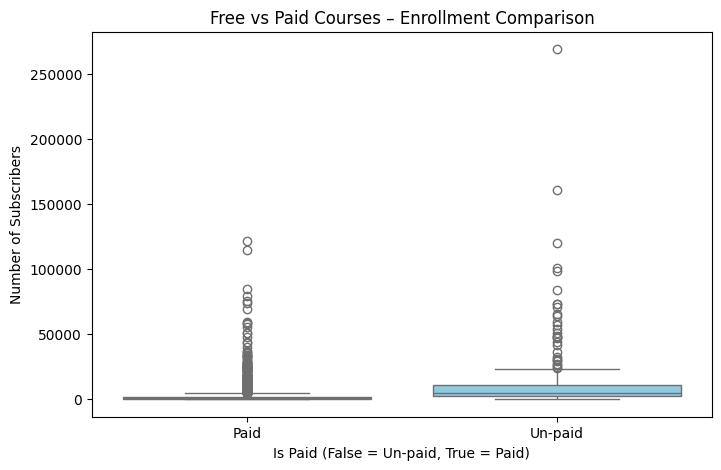

In [106]:
plt.figure(figsize=(8,5))
sns.boxplot(data=ud, x='is_paid', y='num_subscribers', palette=['lightgreen','skyblue'])
plt.title('Free vs Paid Courses – Enrollment Comparison')
plt.xlabel('Is Paid (False = Un-paid, True = Paid)')
plt.ylabel('Number of Subscribers')
plt.show()

- The box on the right (Un-paid / Free) is much higher and more spread out, showing that free courses have a much wider range of subscriber counts.
- The Paid group’s box is very compressed near the bottom — meaning most paid courses have relatively few subscribers

- There are extreme outliers (large circles) among the free courses, reaching well over 200,000+ subscribers.
- Paid courses also have outliers, but they are fewer and smaller — indicating that only a few paid courses reach high enrollment numbers.

- The median (middle line) for free courses is clearly higher than that of paid courses — confirming that free courses, on average, attract more students.

In [107]:
# T-test for difference in mean enrollments
from scipy import stats
t_stat, p_val = stats.ttest_ind(free_courses['num_subscribers'], paid_courses['num_subscribers'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4e}")

if p_val < 0.05:
    print(" Result: The difference in enrollments between free and paid courses is statistically significant.")
else:
    print(" Result: No significant difference found between free and paid courses.")


T-statistic: 6.7697, P-value: 6.3727e-11
 Result: The difference in enrollments between free and paid courses is statistically significant.


#### 13. How do course levels (Beginner, Intermediate, Expert) impact student engagement?


In [108]:
ud['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [109]:
ud

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75.0,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95.0,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,Paid,100.0,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,2016
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,Paid,25.0,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,2017
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,Paid,40.0,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development,2015
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,Paid,50.0,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,2016


In [110]:
# Comparing average engagement per level
# Group by level and compute average engagement metrics
level_engagement = ud.groupby('level')[['num_subscribers', 'num_reviews']].mean().sort_values(by='num_subscribers', ascending=False)

print("Average engagement by course level:")
print(level_engagement)

Average engagement by course level:
                    num_subscribers  num_reviews
level                                           
All Levels              3571.616944   209.860707
Beginner Level          3195.459779   101.794164
Intermediate Level      1762.482185    92.674584
Expert Level             865.448276    40.224138


Here All levels courses have higher average subscribers and no of reviews.

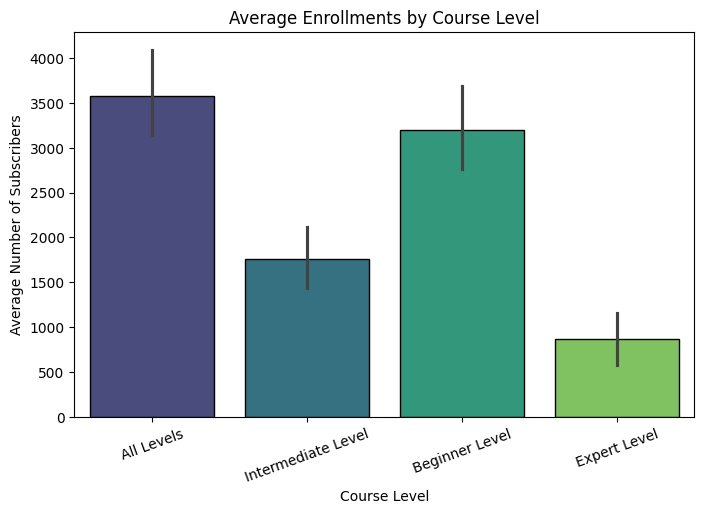

In [111]:
plt.figure(figsize=(8,5))
sns.barplot(data=ud, x='level', y='num_subscribers', estimator='mean', palette='viridis', edgecolor='black')
plt.title('Average Enrollments by Course Level')
plt.xlabel('Course Level')
plt.ylabel('Average Number of Subscribers')
plt.xticks(rotation=20)
plt.show()


#### 14.  What trends can be observed in course publishing dates (yearly/monthly trends)?

In [112]:
ud['published_month'] = ud['published_timestamp'].dt.month
ud

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_year,published_month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200.0,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75.0,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017,3
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,Paid,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016,12
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,Paid,95.0,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017,5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,Paid,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,Paid,100.0,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,2016,6
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,Paid,25.0,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,2017,3
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,Paid,40.0,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development,2015,12
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,Paid,50.0,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,2016,8


In [114]:
# yearly trend
yearly_trend = ud['published_year'].value_counts().sort_index()

print("Courses published per year:")
print(yearly_trend)

Courses published per year:
published_year
2011       5
2012      45
2013     201
2014     490
2015    1013
2016    1204
2017     713
Name: count, dtype: int64


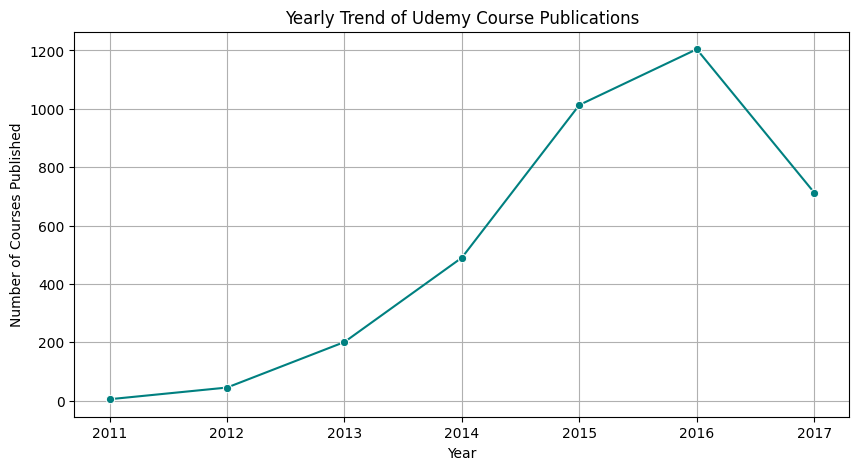

In [116]:
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='teal')
plt.title('Yearly Trend of Udemy Course Publications')
plt.xlabel('Year')
plt.ylabel('Number of Courses Published')
plt.grid(True)
plt.show()


- Rapid growth is seen between 2014–2017, when online learning boomed.
- Plateau or dip afterward as market matured.

In [117]:
# Monthly trends across all years
monthly_trend = ud['published_month'].value_counts().sort_index()

print("Courses published by month:")
print(monthly_trend)

Courses published by month:
published_month
1     292
2     339
3     364
4     355
5     375
6     349
7     277
8     254
9     239
10    286
11    298
12    243
Name: count, dtype: int64


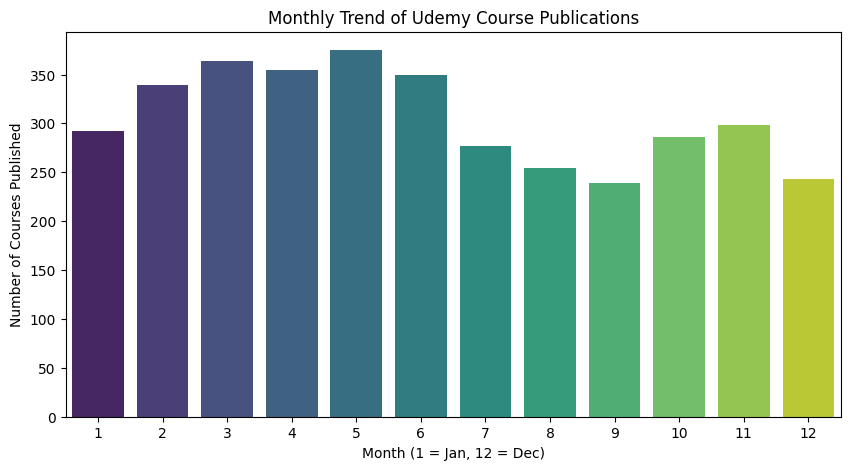

In [118]:
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='viridis')
plt.title('Monthly Trend of Udemy Course Publications')
plt.xlabel('Month (1 = Jan, 12 = Dec)')
plt.ylabel('Number of Courses Published')
plt.show()

- Peaks around January–May → instructors launch new content early in the year.

- Another small rise around november (back-to-school or professional upskilling season).

- Fewer courses are launched in December, likely due to holidays.

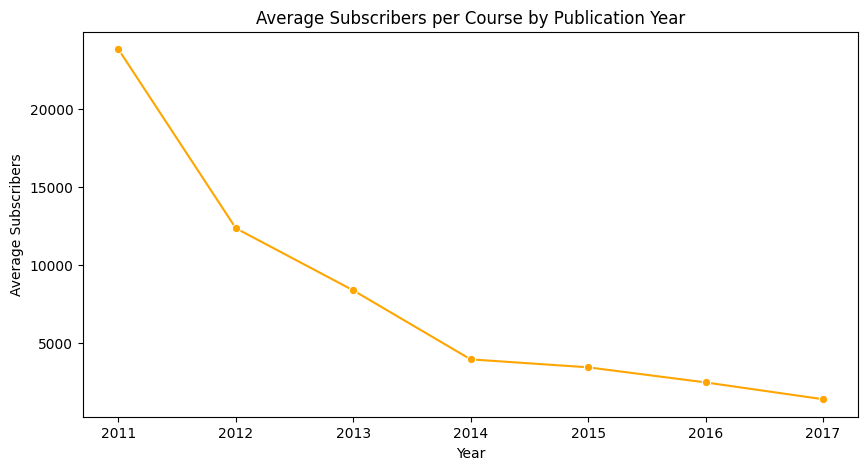

In [120]:
yearly_engagement = ud.groupby('published_year')['num_subscribers'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_engagement.index, y=yearly_engagement.values, marker='o', color='orange')
plt.title('Average Subscribers per Course by Publication Year')
plt.xlabel('Year')
plt.ylabel('Average Subscribers')
plt.show()

- Older courses may have more subscribers because they’ve been available longer.
- Newer courses might have fewer subscribers but often higher-quality or niche topics.

#### 15. Are there any outliers or patterns in pricing, ratings, or enrollment distributions?


In [123]:
# Basic statistics
print(ud[['price', 'num_subscribers']].describe())

            price  num_subscribers
count  3671.00000      3671.000000
mean     66.11550      3191.456007
std      61.03949      9489.251824
min       0.00000         0.000000
25%      20.00000       112.000000
50%      45.00000       912.000000
75%      95.00000      2550.500000
max     200.00000    268923.000000


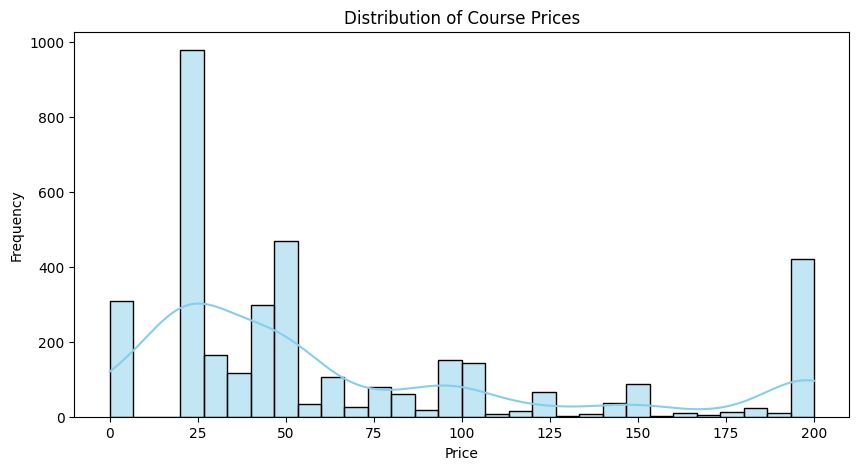

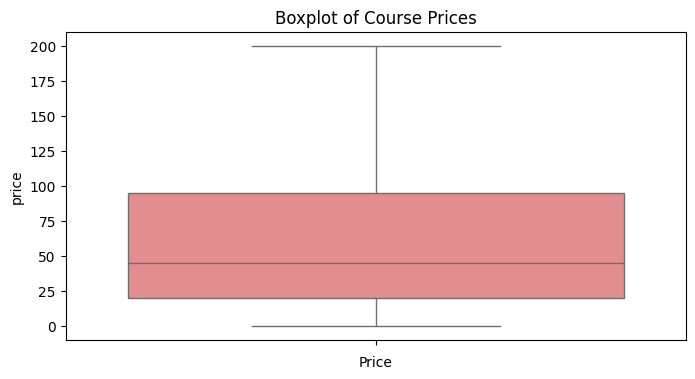

In [125]:
# Price distribution
plt.figure(figsize=(10,5))
sns.histplot(ud['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(ud['price'], color='lightcoral')
plt.title('Boxplot of Course Prices')
plt.xlabel('Price')
plt.show()

- Most courses are priced below $100 with a few outliers upto ~ 200.
- Some outliers might be premium or bundle courses.
- Free courses (price = 0) form a clear separate cluster.

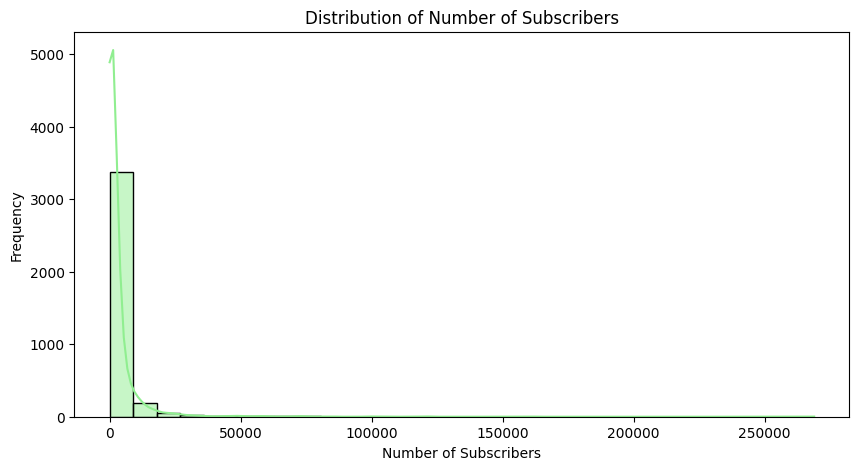

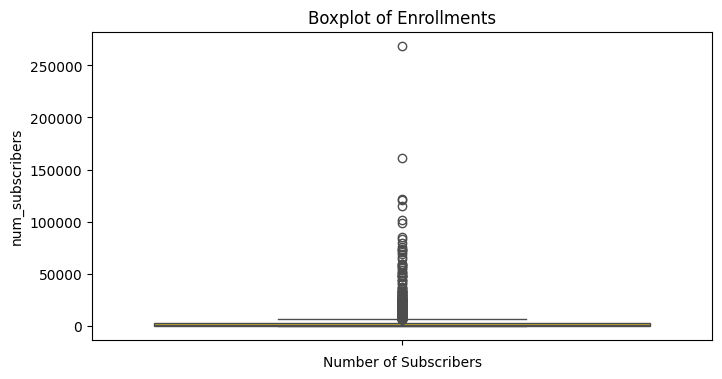

In [127]:
# enrollment distribution
plt.figure(figsize=(10,5))
sns.histplot(ud['num_subscribers'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Number of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(ud['num_subscribers'], color='gold')
plt.title('Boxplot of Enrollments')
plt.xlabel('Number of Subscribers')
plt.show()


- Highly right-skewed distribution — most courses have <5,000 subscribers, but a few reach 100k–250k+.
- These are viral or top-rated courses (outliers with high reach).

In [130]:
#Identifying outliers 
def find_outliers(column):
    Q1 = ud[column].quantile(0.25)
    Q3 = ud[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ud[(ud[column] < lower) | (ud[column] > upper)]
    return outliers, lower, upper

price_outliers, low_p, high_p = find_outliers('price')
sub_outliers, low_s, high_s = find_outliers('num_subscribers')

print(f"Price outliers: {len(price_outliers)} | Range: {low_p:.2f} - {high_p:.2f}")
print(f"Subscriber outliers: {len(sub_outliers)} | Range: {low_s:.2f} - {high_s:.2f}")


Price outliers: 0 | Range: -92.50 - 207.50
Subscriber outliers: 432 | Range: -3545.75 - 6208.25


| Feature                      | Pattern                                      | Outliers                            | Insight                                             |
| ---------------------------- | -------------------------------------------- | ----------------------------------- | --------------------------------------------------- |
| **Price**                    | Most courses priced under $100; peak near $0 | Few high-priced outliers ($150–200) | Free & affordable courses dominate                  |
| **Enrollments**              | Heavily right-skewed                         | Courses >100k subscribers           | A small number of courses attract massive audiences |


#### By analyzing this dataset, we aim to uncover insights on learner preferences, pricing strategies, and engagement drivers, which can help instructors design better courses and help Udemy optimize its platform offerings.

## Conclusion

📅 Yearly Trend:
The number of Udemy courses published grew sharply between 2014–2017, reflecting the platform’s expansion and the global rise of e-learning. Growth stabilized afterward.

🗓️ Monthly Trend:
Most courses are published in the first quarter (Jan–Mar) and again around September, with fewer new courses during holiday months.

Udemy’s course ecosystem shows strong right-skewed distributions in both price and enrollment.
Most courses are low-priced or free, while a small subset of top-performing courses attract disproportionately high enrollments — these are the outliers driving platform engagement.

#### **After analyzing Udemy’s course dataset across price, level, subject, duration, and engagement metrics, several key trends emerge:**

#### **1. Most Popular Course Categories**

- Web Development, Business, and Musical Instruments are among the most popular subjects.

- These categories attract the highest enrollments, indicating strong learner demand in technical and professional skills.

- Course popularity is driven more by content quality (duration and structure) than by price. Free or inexpensive courses dominate enrollments, but once pricing is fixed, the depth and comprehensiveness of the course (duration, number of lectures) have the most influence on subscriber count.

#### 2. Course Features Influencing Enrollment

- Courses with more lectures and longer content durations tend to have higher subscriber counts, suggesting that learners value in-depth content.

- However, extremely long courses may see diminishing returns — balance between content depth and time efficiency matters.

- Price has a negative correlation with enrollment: free and low-cost courses attract significantly more learners.

#### 3. Free vs Paid Courses

- Free courses have higher average enrollments than paid ones — they serve as entry points for learners.

- Paid courses, however, might not reach as many students but can generate higher revenue and often provide more structured, in-depth learning.

- This indicates a trade-off between accessibility (free) and monetary value (paid).

#### 4. Publishing Trends

- There’s a steady upward trend in course publishing over the years, showing the growing popularity of online education.

- Peaks in recent years align with increased demand for e-learning, especially post-2020 (pandemic-driven).

- Indicates that Udemy’s content ecosystem is expanding rapidly across diverse subjects.

#### 6. Outliers and Patterns

- Both price and enrollments show right-skewed distributions:

- Most courses are low-priced or free.

- A few “viral” courses attract massive enrollments (>100K) — these are the outliers driving platform engagement.

- These patterns suggest a long-tail marketplace, where a small number of top courses account for a large portion of enrollments.


Udemy’s marketplace thrives on affordable, beginner-friendly courses in high-demand subjects.
Engagement is driven by free or low-cost, high-value content, while a few exceptional courses dominate enrollments.
Overall, the platform caters primarily to entry-level learners seeking practical, skill-based education, supported by a continuously expanding pool of instructors and content.